In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import athena_read as ar
from glob import glob
from Constants import Constants
import planet_wind_utils as pw

c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

Constants defined...


In [2]:
base_dir = "/Users/morganmacleod/DATA/athenaruns/planet_wind/"
#base_dir = ""
orb = pw.read_trackfile(base_dir+"pm_trackfile.dat")
print "ORB: ... ", orb.colnames


myfile = base_dir+"PLANET_WIND_LAMBDA_2d_6.out1.00008.athdf"
mylevel = 1

x2slicevalue=pw.get_midplane_theta(myfile,level=mylevel)
print "Slicing at x2=",x2slicevalue

d=pw.read_data(myfile,orb,rsoft2=1.e10,level=mylevel,get_cartesian=True,
               x2_min=x2slicevalue,x2_max=x2slicevalue)

t= d['Time']
rcom,vcom = pw.rcom_vcom(orb,t)
x2,y2,z2 = pw.pos_secondary(orb,t)
print t

reading orbit file for planet wind simulation...
ORB: ...  ['ncycle', 'time', 'dt', 'm1', 'm2', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'sep', 'r', 'rhat', 'v', 'vmag', 'vhat', 'xcom', 'ycom', 'zcom', 'vxcom', 'vycom', 'vzcom', 'rcom', 'vcom']
Slicing at x2= 1.5953344106674194
read_data...reading file /Users/morganmacleod/DATA/athenaruns/planet_wind/PLANET_WIND_LAMBDA_2d_6.out1.00008.athdf


planet_wind_utils.py:20: RuntimeWarning: invalid value encountered in divide
  orb['vhat'] = np.array([orb['vx']/orb['vmag'],orb['vy']/orb['vmag'],orb['vz']/orb['vmag']]).T


 ...file read, constructing arrays
 ...gamma= 1.66666666667
...getting cartesian arrays...
8000.0254


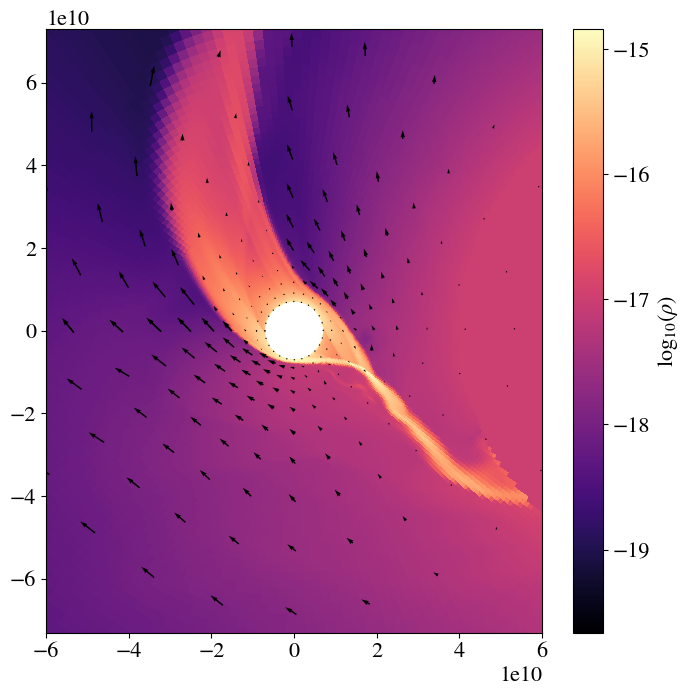

In [3]:
lim = 6.e10
skip = 16

plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:]),
               pw.get_plot_array_midplane(d['y'][:,0,:]),
               np.log10(d['rho'][:,0,:]),
               cmap=plt.cm.magma)
plt.colorbar(label=r"$\log_{10} \left( \rho \right)$")

plt.quiver(pw.get_plot_array_midplane(d['x'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['y'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vx'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vy'][::skip,0,::skip]) )


plt.axis('equal')


plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

(-60000000000.0, 60000000000.0)

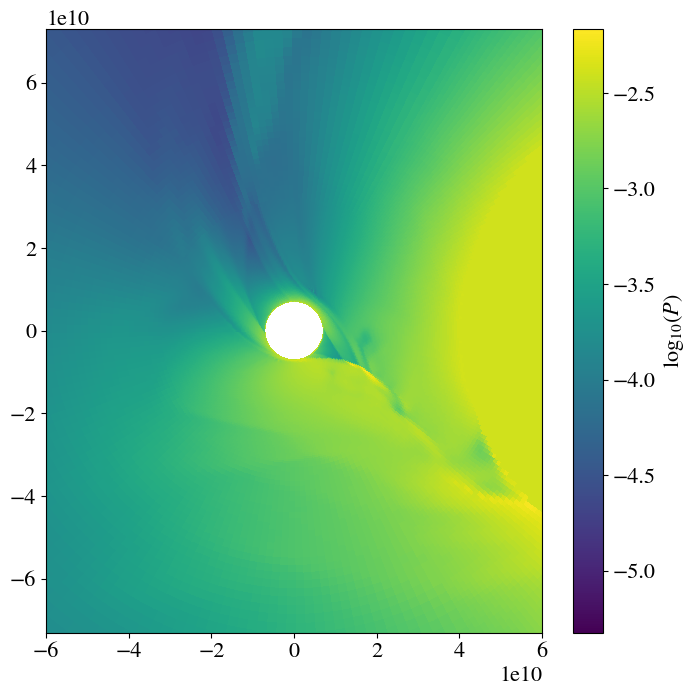

In [4]:
plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:]),
              pw.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10(d['press'][:,0,:]),
              cmap=plt.cm.viridis)
plt.colorbar(label=r"$\log_{10} \left( P \right)$")
plt.axis('equal')

plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

(-60000000000.0, 60000000000.0)

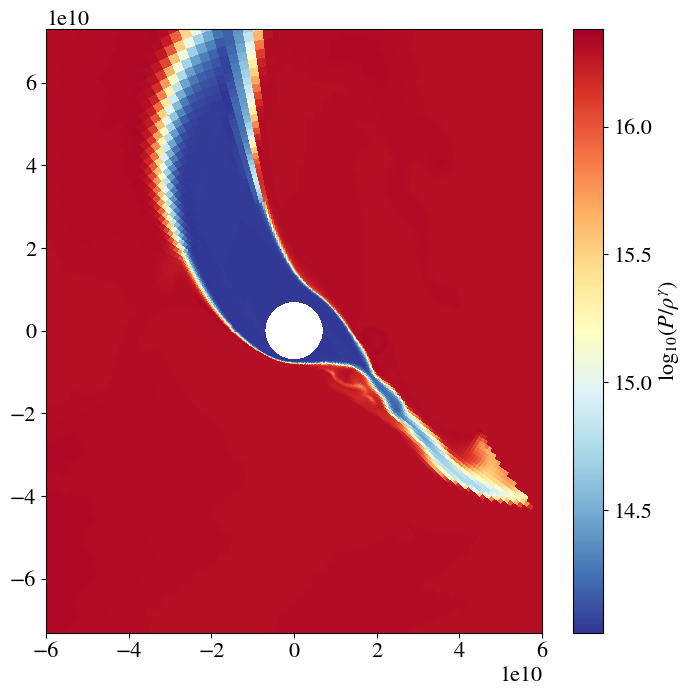

In [5]:
plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:]),
              pw.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10(d['press'][:,0,:]/d['rho'][:,0,:]**1.1),
              cmap=plt.cm.RdYlBu_r)
plt.colorbar(label=r"$\log_{10} \left( P/\rho^\gamma \right)$")
plt.axis('equal')

plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


(-60000000000.0, 60000000000.0)

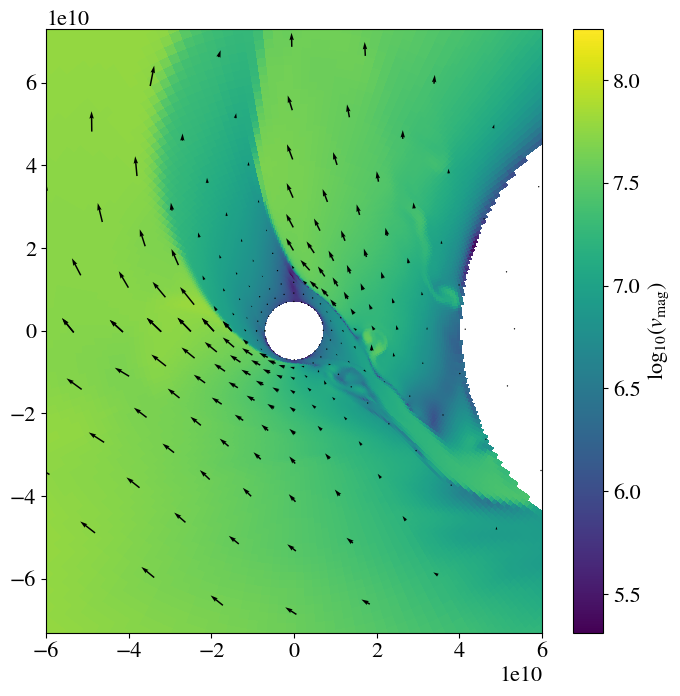

In [6]:
plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:]),
              pw.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10( np.sqrt(d['vx'][:,0,:]**2 + d['vy'][:,0,:]**2 + d['vz'][:,0,:]**2)  ),
              cmap=plt.cm.viridis)
plt.colorbar(label=r"$\log_{10} \left( v_{\rm mag} \right)$")

plt.quiver(pw.get_plot_array_midplane(d['x'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['y'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vx'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vy'][::skip,0,::skip]) )

plt.axis('equal')

plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


(-60000000000.0, 60000000000.0)

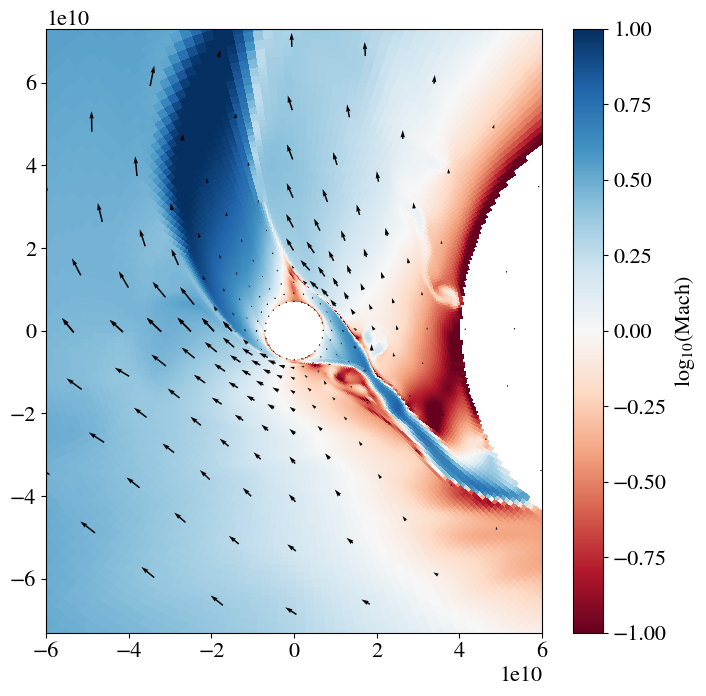

In [7]:
plt.figure(figsize=(8,8) )
plt.pcolormesh(pw.get_plot_array_midplane(d['x'][:,0,:]),
              pw.get_plot_array_midplane(d['y'][:,0,:]),
              np.log10( np.sqrt(d['vx'][:,0,:]**2 + d['vy'][:,0,:]**2 + d['vz'][:,0,:]**2)  / np.sqrt(1.1 *d['press'][:,0,:]/d['rho'][:,0,:] ) ),
              cmap=plt.cm.RdBu,vmin=-1,vmax=1)
plt.colorbar(label=r"$\log_{10} \left( {\rm Mach} \right)$")

plt.quiver(pw.get_plot_array_midplane(d['x'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['y'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vx'][::skip,0,::skip]),
           pw.get_plot_array_midplane(d['vy'][::skip,0,::skip]) )

plt.axis('equal')

plt.plot(x2,y2,'w*')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)